In [1]:
from IPython.display import clear_output
from time import sleep

In [2]:
! pip install mplsoccer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mplsoccer import Pitch, VerticalPitch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.1/80.1 kB 3.6 MB/s eta 0:00:00


In [3]:
matches = pd.read_pickle('/content/drive/MyDrive/Soccer Analytics/2018_FIFA_WORLD_CUP_MATCHES.pkl')
events = pd.read_pickle('/content/drive/MyDrive/Soccer Analytics/2018_FIFA_WORLD_CUP_EVENTS.pkl')

In [4]:
matches

,match_id,match_date,kick_off,stage,stadium,referee,home_team,away_team,home_manager,away_manager,home_score,away_score
0,7585,2018-07-03,20:00:00.000,Round of 16,Otkritie Bank Arena,Mark Geiger,Colombia,England,José Néstor Pekerman,Gareth Southgate,1,1
1,7570,2018-06-28,20:00:00.000,Group Stage,Stadion Kaliningrad,Damir Skomina,England,Belgium,Gareth Southgate,Roberto Martínez Montoliú,0,1
2,7586,2018-07-03,16:00:00.000,Round of 16,Saint-Petersburg Stadium,Damir Skomina,Sweden,Switzerland,Jan Olof Andersson,Vladimir Petković,1,0
3,7557,2018-06-25,20:00:00.000,Group Stage,Mordovia Arena,Enrique Cáceres,Iran,Portugal,Carlos Manuel Brito Leal Queiróz,Fernando Manuel Fernandes da Costa Santos,1,1
4,7542,2018-06-20,14:00:00.000,Group Stage,Stadion Luzhniki,Mark Geiger,Portugal,Morocco,Fernando Manuel Fernandes da Costa Santos,Hervé Renard,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
59,7540,2018-06-19,20:00:00.000,Group Stage,Saint-Petersburg Stadium,Enrique Cáceres,Russia,Egypt,Stanislav Cherchesov,Héctor Raúl Cúper,3,1
60,8652,2018-07-07,20:00:00.000,Quarter-finals,\tOlimpiyskiy Stadion Fisht,Sandro Ricci,Russia,Croatia,Stanislav Cherchesov,Zlatko Dalić,2,2
61,7563,2018-06-26,16:00:00.000,Group Stage,Stadion Luzhniki,Sandro Ricci,Denmark,France,Åge Fridtjof Hareide,Didier Deschamps,0,0
62,7556,2018-06-24,17:00:00.000,Group Stage,\tEkaterinburg Arena,Gianluca Rocchi,Japan,Senegal,Akira Nishino,Aliou Cissé,2,2


In [5]:
events

,match_id,event_time,event_period,play_pattern,team,event_name,event_details
0,7585,"(0, 0)",1,Regular Play,Colombia,Starting XI,{'formation': 433}
1,7585,"(0, 0)",1,Regular Play,England,Starting XI,{'formation': 352}
2,7585,"(0, 0)",1,Regular Play,England,Half Start,None
3,7585,"(0, 0)",1,Regular Play,Colombia,Half Start,None
4,7585,"(0, 0)",1,From Kick Off,Colombia,Pass,"{'player': 'Radamel Falcao García Zárate', 're..."
...,...,...,...,...,...,...,...
95354,7559,"(94, 4)",2,Regular Play,Saudi Arabia,Pass,"{'player': 'Abdullah Ibrahim Otayf', 'recipien..."
95355,7559,"(94, 5)",2,Regular Play,Saudi Arabia,Shot,"{'player': 'Salem Mohammed Al Dawsari', 'locat..."
95356,7559,"(95, 28)",2,From Kick Off,Egypt,Pass,"{'player': 'Mohamed Salah', 'recipient': 'Tare..."
95357,7559,"(95, 33)",2,From Kick Off,Egypt,Half End,None


In [6]:
events.event_name.unique()

array(['Starting XI', 'Half Start', 'Pass', 'Pressure', 'Miscontrol',
       'Foul Committed', 'Shot', 'Dribbled Past', 'Dispossessed',
       'Half End', 'Substitution', 'Tactical Shift', 'Error', 'Offside',
       'Own Goal For'], dtype=object)

In [7]:
e1 = []
for e in events.event_name.unique():
  r = events[events['event_name'] == e]
  e1.append((r.iloc[0,5], r.iloc[0,6]))
e1

[('Starting XI', {'formation': 433}),
 ('Half Start', 'None'),
 ('Pass',
  {'player': 'Radamel Falcao García Zárate',
   'recipient': 'Juan Fernando Quintero Paniagua',
   'location': [60.0, 40.0],
   'end_location': [50.0, 41.0],
   'height': 'Ground Pass',
   'body_part': 'Left Foot',
   'outcome': 'complete'}),
 ('Pressure',
  {'player': 'Harry Kane', 'location': [62.0, 31.0], 'duration': 1.133}),
 ('Miscontrol', {'player': 'Harry Kane', 'location': [42.0, 3.0]}),
 ('Foul Committed',
  {'player': 'Yerry Fernando Mina González',
   'location': [53.0, 56.0],
   'card': 'None'}),
 ('Shot',
  {'player': 'Ashley Young',
   'location': [115.0, 18.0],
   'body_part': 'Right Foot',
   'outcome': 'Saved',
   'xg': 0.009816105}),
 ('Dribbled Past',
  {'player': 'Santiago Arias Naranjo', 'location': [24.0, 67.0]}),
 ('Dispossessed', {'player': 'Kieran Trippier', 'location': [98.0, 65.0]}),
 ('Half End', 'None'),
 ('Substitution',
  {'player': 'Jefferson Andrés Lerma Solís',
   'replacement': '

# **Exploratory Data Analysis on StatsBomb data**

## **Q1-1**

In [8]:
def fifteen_min_interval(period,time_tuple):
  if period == 1:
    if (time_tuple[0] >= 0) & (time_tuple[0] < 15):
      return '0-15'
    elif (time_tuple[0] >= 15) & (time_tuple[0] < 30):
      return '15-30'
    elif (time_tuple[0] >= 30):
      return '30-1st_half'
  elif period == 2:
    if (time_tuple[0] >= 45) & (time_tuple[0] < 60):
      return '45-60'
    elif (time_tuple[0] >= 60) & (time_tuple[0] < 75):
      return '60-75'
    elif (time_tuple[0] >= 75):
      return '75-2nd_half'
  elif period == 3:
    return '1st_ext'
  elif period == 4:
    return '2nd_ext'

In [9]:
def q1_1_report(events):
  # ORDINARY GOALS
  SHOT = events[(events.event_name == 'Shot')]
  SHOT_DETAILS = pd.DataFrame(list(SHOT['event_details']))
  SHOT.index = list(range(len(SHOT_DETAILS)))
  SHOT = pd.concat([SHOT.iloc[:,:len(SHOT.columns)-1], SHOT_DETAILS], axis = 1)
  GOALS = SHOT[(SHOT.outcome == 'Goal') & (SHOT.event_period != 5)]
  GOALS = GOALS.loc[:,['event_period', 'event_time']]
  # OWN GOALS
  OWNGOALS = events[events.event_name == 'Own Goal For']
  OWNGOALS = OWNGOALS.loc[:,['event_period', 'event_time']]
  # CONCATENATE BOTH GOALS AND OWNGOALS TABLES
  TOTAL_GOALS = pd.concat([GOALS,OWNGOALS])
  TOTAL_GOALS.index = list(range(len(TOTAL_GOALS)))
  TOTAL_GOALS['interval_15'] = [fifteen_min_interval(p,t) for p,t in list(zip(TOTAL_GOALS['event_period'], TOTAL_GOALS['event_time']))]
  # PLOT BARPLOT
  plt.figure(figsize = (10,5))
  interval_order = ['0-15','15-30','30-1st_half', '45-60', '60-75', '75-2nd_half', '1st_ext', '2nd_ext']
  sns.countplot(TOTAL_GOALS, x = 'interval_15', order = interval_order)
  plt.xlabel('15 minute time intervals')
  plt.ylabel('Number of Goals')
  plt.title('#GOALS IN EACH TIME INTERVAL')
  plt.show()
  return None

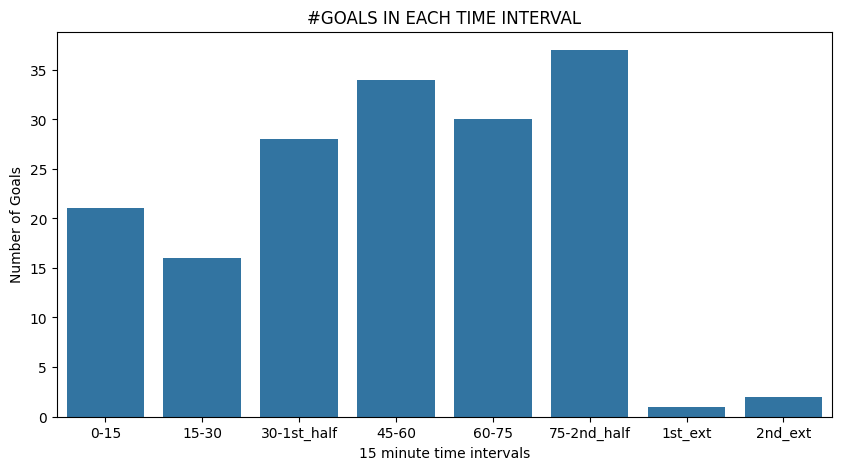

In [10]:
TOTAL_GOALS = q1_1_report(events)

## **Q1-2**

In [11]:
def extra_time(period, time_tuple):
  time_list = list(time_tuple)
  if period == 1:
    time_list[0] = time_list[0] - 45
  elif period == 2:
    time_list[0] = time_list[0] - 90
  elif period == 3:
    time_list[0] = time_list[0] - 105
  elif period == 4:
    time_list[0] = time_list[0] - 120
  return (60 * time_list[0] + time_list[1]) / 60

In [12]:
def q1_2_report(matches, events):
  HALF_END = events[(events.event_name == 'Half End') & (events.event_period != 5)]
  HALF_END = HALF_END.merge(matches.loc[:,['match_id', 'referee']], how = 'left', on = 'match_id')
  HALF_END['calculated_extra_time'] = [extra_time(p,t) for p,t in list(zip(HALF_END.event_period, HALF_END.event_time))]
  HALF_END = HALF_END.loc[:,['referee', 'event_period', 'calculated_extra_time']]
  HALF_END = HALF_END.groupby('referee')['calculated_extra_time'].sum()
  HALF_END = pd.DataFrame({'referee': list(HALF_END.index),
                           'extra_time':[float(HALF_END[i]/2) for i in range(len(HALF_END))]})
  HALF_END = HALF_END.sort_values(by = 'extra_time', ascending=False)
  # HORIZONTAL BAR CHART
  plt.figure(figsize=(10,10))
  sns.barplot(data = HALF_END, x = 'extra_time', y = 'referee')
  plt.show()
  return None

<ipython-input-12-e6c456d04369>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'extra_time':[float(HALF_END[i]/2) for i in range(len(HALF_END))]})


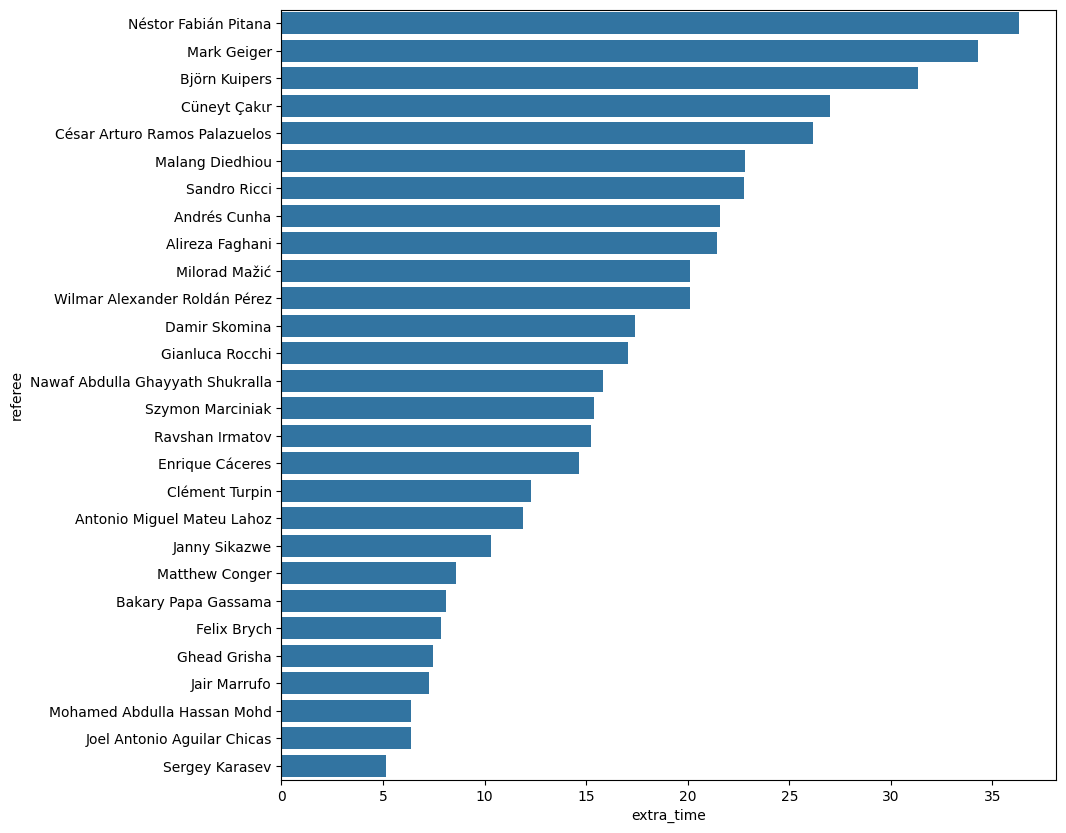

In [13]:
q1_2_report(matches, events)

## **Q1-3**

In [14]:
events[events.event_name == 'Foul Committed'].loc[81,'event_details']

{'player': 'Yerry Fernando Mina González',
 'location': [53.0, 56.0],
 'card': 'None'}

In [15]:
def q1_3_report(matches, events):
  FOULS = events[(events.event_name == 'Bad Behaviour') | (events.event_name == 'Foul Committed')]
  FOULS.index = list(range(len(FOULS)))
  FOULS = pd.concat([FOULS.iloc[:,:len(FOULS.columns)-1], pd.DataFrame(list(FOULS.event_details))], axis = 1)
  FOULS = FOULS[FOULS.card != 'None']
  FOULS = FOULS.merge(matches.loc[:,['match_id', 'match_date']], how = 'left', on = 'match_id')
  FOULS = FOULS[['match_id', 'match_date', 'card']]
  LABELS = list(FOULS.card.unique())
  FOULS = FOULS.groupby(['match_date', 'card']).size().unstack(fill_value = 0) #.reindex(LABELS, fill_value = 0)
  FOULS['date'] = list(FOULS.index)
  FOULS.index = list(range(len(FOULS)))
  # TIME SERIES CHART
  plt.figure(figsize = (10,5))
  plt.plot(FOULS.date, FOULS['Yellow Card'], label = 'Yellow card', color = 'y', marker = 'o')
  plt.plot(FOULS.date, FOULS['Second Yellow'], label = 'Second Yellow', color = 'orange', marker = '^')
  plt.plot(FOULS.date, FOULS['Red Card'], label = 'Red Card', color = 'r', marker = '*')
  plt.title('Time series of card frequency')
  plt.legend()
  # sns.lineplot(data = FOULS, x = 'date', y = 'count', hue = 'card', palette=['yellow', 'red', 'orange'])
  plt.xticks(rotation = 90)
  plt.show()
  return None

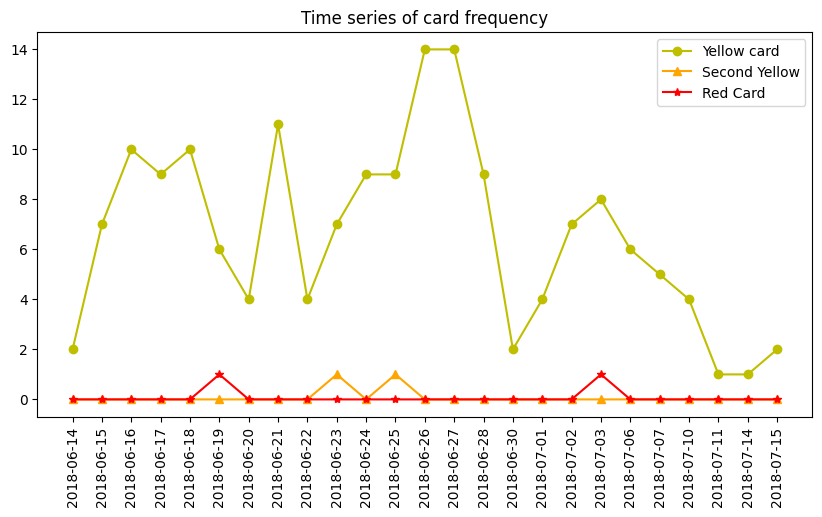

In [16]:
q1_3_report(matches, events)

## **Q1-4**

In [17]:
def q1_4_report(events):
  PASS = events[events.event_name == 'Pass']
  # PASS = PASS[PASS.event_period == 1]
  PASS.index = list(range(len(PASS)))
  PASS = pd.concat([PASS.iloc[:,:len(PASS.columns)-1], pd.DataFrame(list(PASS['event_details']))], axis = 1)
  PASS = PASS[(PASS.recipient != 'None') & (PASS.outcome == 'complete')]
  PASS.index = list(range(len(PASS)))
  PASS['couple'] = [{f"{PASS.loc[i,'player']}", f"{PASS.loc[i,'recipient']}"} for i in range(len(PASS))]
  PASS.loc[:,['location', 'end_location', 'couple', 'height']]
  # REPORT TOP 10 COUPLE PASS
  report1 = PASS.couple.value_counts()
  report1 = pd.DataFrame({'couple': list(report1.index),
                          'count': list(report1)})
  # USER INPUT
  while True:
    couple_index = int(input(f'''======>THE 10 HIGHEST NUMBER OF ACCURATE PASSES BETWEEN 2 PLAYERS
{report1.loc[:20]}
==>WHICH OF 2 PLAYERS DO YOU WANT TO ANALYSE THEIR LOCATIONS ON THE FOOTBALL PITCH (INDEX): '''))
    print('\n')
    if couple_index in report1.index:
      break
    else:
      print('==>INVALID INPUT! TRY AGAIN!<==')
      continue
  # REPORT 2: CHOOSEN COUPLE WITH THEIR COORDINATIONS
  report2 = PASS[PASS.couple == report1.loc[couple_index,'couple']].loc[:,['couple', 'location', 'end_location','height']]
  report2['couple'] = [' <-> '.join(list(report2.iloc[i,0])) for i in range(len(report2))]
  # SUBPLOT 1X3: FOOTBALL PITCH AND BARCHART
  fig, ax = plt.subplots(1,3, figsize=(20,7))
  # PLOT1: BAR CHART
  report1 = report1.loc[:20]
  report1['couple'] = [list(p) for p in report1.couple]
  report1['couple_str'] = [f'{p[0]} - {p[1]}' for p in report1.couple]
  sns.barplot(data = report1, y = 'couple_str', x = 'count',ax=ax[0])
  ax[0].set_title('TOP 10 number of passes between 2 players')
  ax[0].set_xlabel('Number of passes')
  ax[0].set_ylabel('Name of 2 players')
  # PLOT1: FOOTBALL PITCH
  pitch = VerticalPitch(pitch_color = 'grass', line_color = 'white', half=False)
  # pitch = Pitch(pitch_color = 'grass', line_color = 'white', half = False)
  pitch.draw(ax=ax[1])
  for p in list(zip(report2.location, report2.end_location)):
    sns.lineplot(y = [p[0][0], p[1][0]], x = [p[0][1], p[1][1]], ax=ax[1],  color = 'blue', lw = 0.5)
  ax[1].set_title(f"{report2.iloc[0,0]} \npasses' location")
  # PLOT3: PIE CHART
  ax[2].pie(x = list(report2.height.value_counts()) ,labels = list(report2.height.value_counts().index))
  ax[2].set_title(f"{report2.iloc[0,0]} \npasses' height proportion")
  plt.tight_layout()
  plt.show()
  return None

======>THE 10 HIGHEST NUMBER OF ACCURATE PASSES BETWEEN 2 PLAYERS
                                               couple  count
0   {Jordi Alba Ramos, Francisco Román Alarcón Suá...    230
1             {Sergio Ramos García, Jordi Alba Ramos}    209
2                          {John Stones, Kyle Walker}    192
3                {Toby Alderweireld, Vincent Kompany}    158
4                        {John Stones, Harry Maguire}    148
5   {Philippe Coutinho Correia, Neymar da Silva Sa...    144
6        {Sergio Ramos García, Gerard Piqué Bernabéu}    141
7   {Andrés Iniesta Luján, Francisco Román Alarcón...    140
8                {Mark Milligan, Aziz Eraltay Behich}    139
9   {Sergio Ramos García, Francisco Román Alarcón ...    139
10                      {Dejan Lovren, Šime Vrsaljko}    136
11                       {Luka Modrić, Šime Vrsaljko}    135
12  {Philippe Coutinho Correia, Marcelo Vieira da ...    128
13                    {Luka Modrić, Marcelo Brozović}    124
14                 

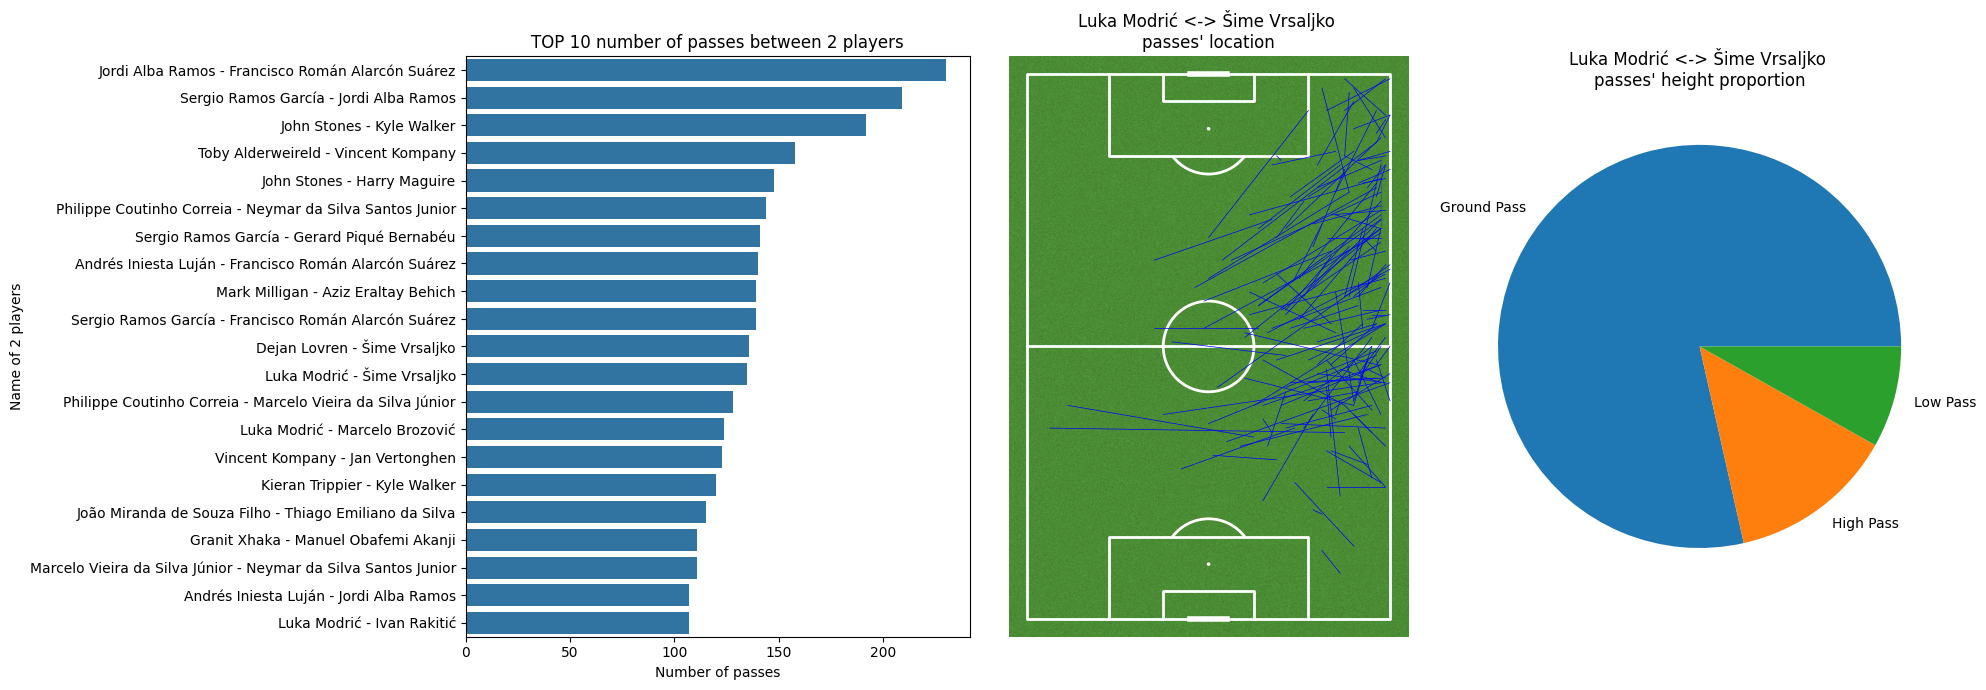

In [18]:
q1_4_report(events)

## **Q1-5**

In [19]:
def manager_selector(SUB_ROW):
  SUB_ROW = list(SUB_ROW)
  if SUB_ROW[4] == SUB_ROW[9]:
    return SUB_ROW[11]
  else:
    return SUB_ROW[12]

In [20]:
def q1_5_report(events, matches):
  SUB = events[events.event_name == 'Substitution']
  SUB.index = list(range(len(SUB)))
  SUB = pd.concat([SUB.iloc[:, :len(SUB.columns)-1], pd.DataFrame(list(SUB.event_details))], axis = 1)
  SUB = SUB.merge(matches[['match_id', 'home_team', 'away_team', 'home_manager', 'away_manager']], how = 'left', on = 'match_id')
  SUB['manager'] = [manager_selector(SUB.iloc[i,:]) for i in range(len(SUB))]
  SUB['event_time'] = [f'{SUB.iloc[i,1][0]}:{SUB.iloc[i,1][1]}' for i in range(len(SUB))]
  SUB['2teams'] = [' Vs '.join(list(SUB.iloc[i,9:11])) for i in range(len(SUB))]
  SUB = SUB[['2teams', 'event_time','team', 'manager', 'player', 'replacement','reason']]
  SUB['couple'] = [set([SUB.loc[i,'player'], SUB.loc[i,'replacement']]) for i in range(len(SUB))]
  REPORT = SUB.couple.value_counts()
  REPORT = pd.DataFrame({
      '2players':list(REPORT.index),
      'frequency':list(REPORT)
  })
  # USER INPUT
  while True:
    couple_index = int(input(f'''======>THE 10 HIGHEST NUMBER OF SUBSTITUTION BETWEEN 2 PLAYERS
{REPORT.iloc[:10,:]}
==>WHICH OF 2 PLAYERS DO YOU WANT TO SEE MORE DETAILS ABOUT THEIR SUBSTITUTION (INDEX): '''))
    print('\n')
    if couple_index in REPORT.index:
      break
    else:
      print('==>INVALID INPUT! TRY AGAIN!<==')
      continue
  print(f"{' & '.join(list(REPORT.iloc[couple_index,0]))} SUBSTITUTION DETAILS")
  print('\n',SUB[SUB.couple == REPORT.iloc[couple_index,0]][['2teams', 'event_time','team', 'manager', 'player', 'replacement', 'reason']],'\n')

  return None

In [21]:
q1_5_report(events, matches)

======>THE 10 HIGHEST NUMBER OF SUBSTITUTION BETWEEN 2 PLAYERS
                                            2players  frequency
0                 {Blaise Matuidi, Corentin Tolisso}          4
1                 {Marcus Rashford, Raheem Sterling}          4
2                   {Antoine Griezmann, Nabil Fekir}          4
3     {Odion Jude Ighalo, Kelechi Promise Iheanacho}          3
4                  {Marcus Berg, Isaac Kiese Thelin}          3
5          {Diego da Silva Costa, Iago Aspas Juncal}          3
6                      {Josip Pivarić, Ivan Strinić}          3
7  {Gonçalo Manuel Ganchinho Guedes, André Miguel...          3
8  {Nahitan Michel Nández Acosta, Carlos Andrés S...          3
9                      {Fyodor Smolov, Artem Dzyuba}          3
==>WHICH OF 2 PLAYERS DO YOU WANT TO SEE MORE DETAILS ABOUT THEIR SUBSTITUTION (INDEX): 7


Gonçalo Manuel Ganchinho Guedes & André Miguel Valente Silva SUBSTITUTION DETAILS

                   2teams event_time      team  \
22      

## **Q1-6**

In [23]:
def continent(country_name):
  ASIA = ['Iran', 'South Korea', 'Australia', 'Japan', 'Saudi Arabia']
  EUROPE = ['England', 'Sweden', 'Portugal', 'Croatia', 'Serbia', 'Belgium',
            'Poland', 'France', 'Germany', 'Switzerland', 'Denmark', 'Iceland',
            'Spain', 'Russia']
  NORTH_AMERICA = ['Panama', 'Costa Rica', 'Mexico']
  SOUTH_AMERICA = ['Colombia', 'Brazil', 'Uruguay', 'Argentina', 'Peru']
  AFRICA = ['Egypt', 'Tunisia', 'Nigeria', 'Senegal', 'Morocco']

  if country_name in ASIA:
    return 'Asia'
  elif country_name in EUROPE:
    return 'Europe'
  elif country_name in NORTH_AMERICA:
    return 'North_America'
  elif country_name in SOUTH_AMERICA:
    return 'South_America'
  else:
    return 'Africa'

In [24]:
def q1_6_report(events):
  # ORDINARY GOALS
  SHOT = events[(events.event_name == 'Shot')]
  SHOT.index = list(range(len(SHOT)))
  SHOT = pd.concat([SHOT.iloc[:,:len(SHOT.columns)-1], pd.DataFrame(list(SHOT['event_details']))], axis = 1)
  GOALS = SHOT[(SHOT.outcome == 'Goal') & (SHOT.event_period != 5)]
  GOALS = GOALS.loc[:,['team', 'play_pattern']]
  GOALS['continent'] = [continent(c) for c in GOALS.team]
  # STACKED BAR CHART
  plt.figure(figsize = (10,5))
  sns.histplot(data = GOALS, x = 'continent', hue = 'play_pattern', stat = 'count', multiple = 'stack', element='bars', linewidth = 0.25)
  plt.title('#GOALS FOR EACH CONTINENT STACKED BARCHART')
  plt.show()
  return None

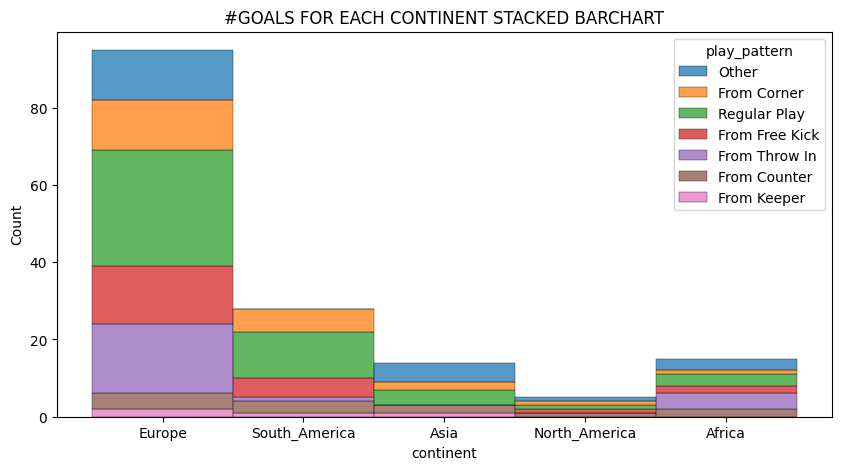

In [25]:
q1_6_report(events)

## **Q2_1**

In [26]:
def q2_1_report(events, matches):
  TACTIC = events[(events.event_name == 'Starting XI')|(events.event_name == 'Tactical Shift')]
  TACTIC.index = list(range(len(TACTIC)))
  TACTIC = pd.concat([TACTIC.iloc[:, :len(TACTIC.columns)-1], pd.DataFrame(list(TACTIC.event_details))], axis = 1)
  TACTIC = TACTIC[['match_id', 'event_name', 'team', 'formation']]
  TACTIC = TACTIC.merge(matches[['match_id', 'home_manager', 'away_manager', 'home_team', 'away_team']], how = 'left', on = 'match_id')
  while True:
    COUNTRY_NAME = input('COUNTRY NAME:')
    print('\n')
    if COUNTRY_NAME in TACTIC['team'].unique():
      break
    else:
      continue
  TACTIC = TACTIC[TACTIC.team == COUNTRY_NAME]

  for id in TACTIC['match_id'].unique():
    tactic = TACTIC[TACTIC.match_id == id]
    tactic.index = list(range(len(tactic)))
    print(f"==> MATCH {id}: {tactic.loc[0,'home_team']} VS. {tactic.loc[0,'away_team']}")
    tactic_str = [str(f) for f in list(tactic.loc[:,'formation'])]
    print('-->'.join(tactic_str))
    print('====================================================================')
  return None

In [27]:
q2_1_report(events, matches)

COUNTRY NAME:Japan


==> MATCH 7584: Belgium VS. Japan
4231
==> MATCH 7572: Japan VS. Poland
442-->4141
==> MATCH 7541: Colombia VS. Japan
4231
==> MATCH 7556: Japan VS. Senegal
4231-->442


## **Q2_2**

In [28]:
def euclidean_distance(coor_1, coor_2): return np.sqrt((coor_1[0] - coor_2[0]) ** 2 + (coor_1[1] - coor_2[1]) ** 2)

In [29]:
def q2_2_report(events):
  PASS = events[events.event_name == 'Pass']
  PASS.index = list(range(len(PASS)))
  PASS = pd.concat([PASS.iloc[:,:len(PASS.columns)-1], pd.DataFrame(list(PASS['event_details']))], axis = 1)
  PASS = PASS[(PASS.recipient != 'None') & (PASS.outcome == 'complete')]
  PASS.index = list(range(len(PASS)))
  PASS['length'] = [euclidean_distance(PASS.loc[i,'location'], PASS.loc[i,'end_location']) for i in range(len(PASS))]
  COUNTRIES = input('COUNTRIES(sep = , ): ')
  COUNTRIES = COUNTRIES.split(',')
  COUNTRIES = [(PASS.loc[i,'team'] in COUNTRIES) for i in range(len(PASS))]
  # REPORT1
  report1 =  PASS[COUNTRIES][['team','length']]
  report1 = report1.groupby('team')['length'].mean()
  report1 = pd.DataFrame({'team': list(report1.index),
                       'pass_length_avg': list(report1)})
  report1 = report1.sort_values('pass_length_avg', ascending = True)

  # REPORT2
  report2 = PASS[COUNTRIES]['team'].value_counts()
  # SUBPLOT 1X2
  plt.figure(figsize=(10,4))
  # BARCHART 1 MEAN PASS LENGTH
  plt.subplot(1,2,1)
  sns.barplot(report1, x = 'team', y = 'pass_length_avg', color = 'blue')
  plt.ylabel("average of correct passes' length")
  # BARCHART 2 MEAN PASS LENGTH
  plt.subplot(1,2,2)
  sns.barplot(x = list(report2.index), y = list(report2), color = 'red')
  plt.ylabel('number of complete pass')
  plt.xlabel('team')
  plt.tight_layout()
  plt.show()
  return None

COUNTRIES(sep = , ): Iran,Japan,Uruguay,Brazil


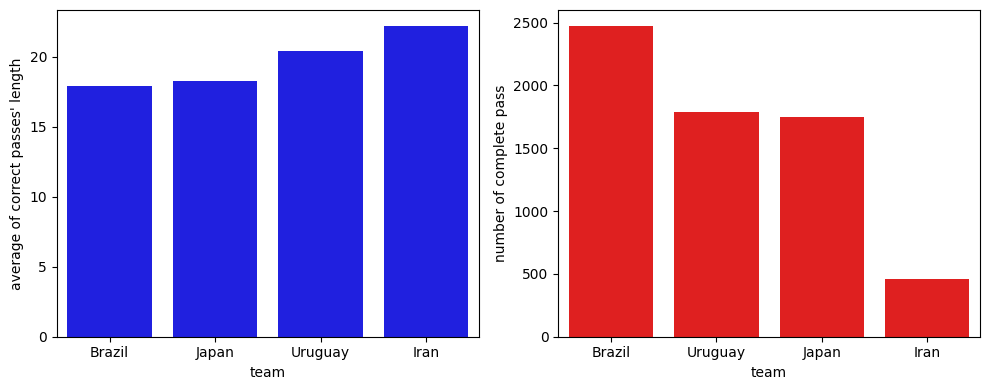

In [30]:
q2_2_report(events)

## **Q3-1**

In [31]:
def q3_1_report(events, matches):
  SHOT = events[(events.event_name == 'Shot')]
  SHOT.index = list(range(len(SHOT)))
  SHOT = pd.concat([SHOT.iloc[:,:len(SHOT.columns)-1], pd.DataFrame(list(SHOT['event_details']))], axis = 1)
  SHOT = SHOT[SHOT.event_period != 5]
  SHOT = SHOT.merge(matches[['match_id','home_team', 'away_team']], how = 'left', on = 'match_id')
  SHOT['2teams'] = [{SHOT.loc[i,'home_team'], SHOT.loc[i, 'away_team']} for i in range(len(SHOT))]
  TEAMS = input('MATCH (Ex -> team1-team2): ')
  TEAMS = set(TEAMS.split('-'))
  SHOT = SHOT[SHOT['2teams'] == TEAMS]
  SHOT.index = list(range(len(SHOT)))
  SHOT['X'] = [SHOT.loc[i,'location'][0] for i in range(len(SHOT))]
  SHOT['Y'] = [SHOT.loc[i,'location'][1] for i in range(len(SHOT))]
  SHOT = SHOT[['team', 'X','Y', 'xg', 'outcome']]
  # PLOT
  fig = plt.figure(constrained_layout=True,figsize=(8,8))
  gs = fig.add_gridspec(8, 8)
  field = fig.add_subplot(gs[0:4, 0:8])
  field.set_title('football pitch')
  pitch = VerticalPitch(pitch_color='grass', line_color='white', stripe=True, half = True)
  pitch.draw(ax= field)
  sns.scatterplot(data = SHOT, y = 'X', x = 'Y', hue = 'team', palette=['blue', 'red'], size = 'xg', alpha = 0.5, sizes = (50,300))
  pie1 = fig.add_subplot(gs[4:8,0:4])
  pie1.pie(labels = list(SHOT[SHOT.team == list(TEAMS)[0]]['outcome'].unique()), x = list(SHOT[SHOT.team == list(TEAMS)[0]]['outcome'].value_counts()))
  pie1.set_title(list(TEAMS)[0], fontsize = 20)
  pie2 = fig.add_subplot(gs[4:8,4:8])
  pie2.pie(labels = list(SHOT[SHOT.team == list(TEAMS)[1]]['outcome'].unique()), x = list(SHOT[SHOT.team == list(TEAMS)[1]]['outcome'].value_counts()))
  pie2.set_title(list(TEAMS)[1], fontsize = 20)
  plt.tight_layout()
  plt.show()
  return None

MATCH (Ex -> team1-team2): Iran-Spain


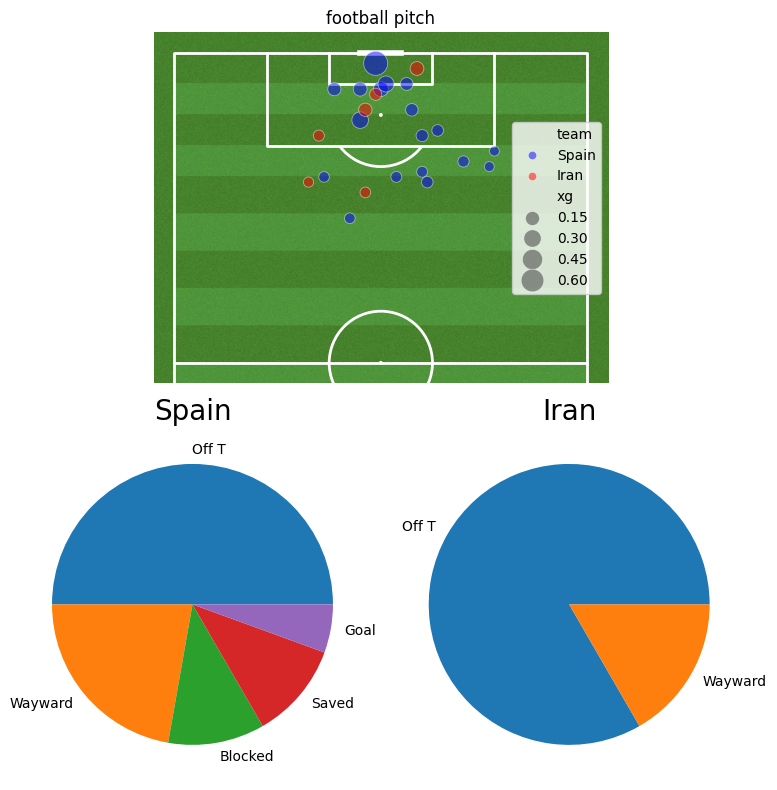

In [32]:
F = q3_1_report(events, matches)

## **Q3-2**

In [33]:
def q3_2_report(events, matches):
  TOR = events[(events.event_name == 'Miscontrol')|(events.event_name == 'Foul Committed')|(events.event_name == 'Dispossessed')|(events.event_name == 'Error')|(events.event_name == 'Offside')|(events.event_name == 'Dribbled Past')]
  TOR.index = list(range(len(TOR)))
  LABELS = list(TOR.event_name.unique())
  TOR = TOR.merge(matches[['match_id', 'home_team','away_team']], how = 'left', on = 'match_id')
  TOR['2teams'] = [{TOR.loc[i,'home_team'], TOR.loc[i, 'away_team']} for i in range(len(TOR))]
  TEAMS = input('MATCH (Ex -> team1-team2): ')
  TEAMS = set(TEAMS.split('-'))
  TOR = TOR[TOR['2teams'] == TEAMS]
  TOR1 = TOR[TOR.team == list(TEAMS)[0]].groupby(['event_name'])['event_name'].size().reindex(LABELS, fill_value = 0)
  TOR2 = TOR[TOR.team == list(TEAMS)[1]].groupby(['event_name'])['event_name'].size().reindex(LABELS, fill_value = 0)
  # TORNADO PLOT
  fig, ax = plt.subplots(figsize=(10, 7), facecolor='#f6f6f6')
  ax.barh(y=list(TOR1.index), width=list(TOR1), align='center', height=0.6, facecolor='blue', label = list(TEAMS)[0])#, edgecolor='black')
  ax.barh(y=list(TOR2.index), width=list(-1 * TOR2), align='center', height=0.6, facecolor='red', label = list(TEAMS)[1])#, edgecolor='black')
  ax.set_xticks(ax.get_xticks(), map(np.abs, ax.get_xticks()))
  ax.set_title(f'{list(TEAMS)[1]} Vs. {list(TEAMS)[0]}', fontsize = 30)
  ax.vlines(x = 0, ymax=max(ax.get_yticks())+0.5, ymin = -0.5)
  ax.legend()
  plt.show()
  return None

MATCH (Ex -> team1-team2): Spain-Morocco


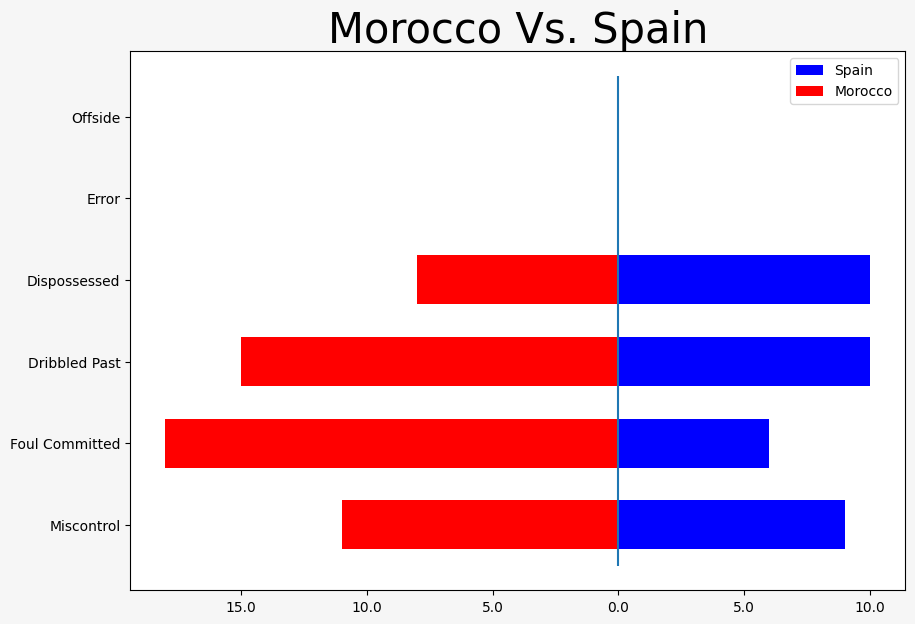

In [35]:
q3_2_report(events, matches)

# **MENU**

In [ ]:
def MENU(events, matches):
  while True:
    sleep(2)
    bottom = input('''==========WELCOME TO 2018 FIFA WORLD CUP REPORT CENTER==========
CHOOSE ONE OF THE SECTION BELLOW:
(A) TOURNAMENT REPORT
(B) TEAM REPORT
(C) MATCH REPORT
(D) QUIT
YOUR CHOICE: ''')
    if bottom == 'A':
      print('\n============================TOURNAMENT REPORT============================')
      click = int(input("""CHOOSE ONE OF THE TOURNAMENT'S REPORTS BELLOW:
(1) NUMBER OF SCORED GOALS IN EACH 15 MINUTES TIME INTERVAL [VERTICAL BAR CHART]
(2) SUM OF CALCULATED EXTRA TIME BY EACH REFEREE IN THE TOURNAMENT [HORIZONTAL BAR CHART]
(3) TIME SERIES OF #RED CARD, #YELLOW CARD, #SECOND YELLOW CARD IN THE TOURNAMENT [TIME SERIES LINE CHART]
(4) TOP 10 OF HIGHEST NUMBER OF PASSES BETWEEN 2 PLAYERS [DATA FRAME & SUBPLOTS(1,3)]
(5) TOP 10 OF HIGHEST NUMBER OF SUBSTITUTIONS BETWEEN 3 PLAYERS [DATA FRAME]
(6) NUMBER OF GOALS FOR EACH CONTINENT [BAR CHART]
YOUR CHOICE: """))
      if click == 1:
        o = q1_1_report(events)
      elif click == 2:
        o = q1_2_report(matches, events)
      elif click == 3:
        o = q1_3_report(matches, events)
      elif click == 4:
        o = q1_4_report(events)
      elif click == 5:
        o = q1_5_report(events, matches)
      elif click == 6:
        o = q1_6_report(events)
      sleep(10)
      MAIN = input('PUSH ANY KEYS WHEN YOU DECIDE TO RETURN TO MAIN MENU: ')
      clear_output()
      continue
    elif bottom == 'B':
      print('\n============================TEAM REPORT============================')
      click = int(input("""CHOOSE ONE OF THE TEAM'S REPORTS BELLOW:
(1) TACTICAL SHIFT REPORT
(2) AVERAGE LENGTH OF CORRECT PASSES & NUMBER OF CORRECT PASSES [SUBPLOT(1,2)]
YOUR CHOICE: """))
      if click == 1:
        o = q2_1_report(events, matches)
      elif click == 2:
        o = q2_2_report(events)
      sleep(10)
      MAIN = input('PUSH ANY KEYS WHEN YOU DECIDE TO RETURN TO MAIN MENU: ')
      clear_output()
      continue
    elif bottom == 'C':
      print('\n============================MATCH REPORT============================')
      click = int(input("""CHOOSE ONE OF THE GAME'S REPORTS BELLOW:
(1) LOCATIONS OF SHOTS DURING A SPECIFIC MATCH FOR BOTH OPPONENTS [PIE CHART & BUBBLE CHART & BAR CHART]
(2) 6 FEATURES TORNADO PLOT FOR BOTH OPPONENTS
YOUR CHOICE: """))
      if click == 1:
        o = q3_1_report(events, matches)
      elif click == 2:
        o = q3_2_report(events, matches)
      sleep(10)
      MAIN = input('PUSH ANY KEYS WHEN YOU DECIDE TO RETURN TO MAIN MENU: ')
      clear_output()
      continue
    elif bottom == 'D':
      clear_output()
      print('BYE BYE!')
      break
    else:
      clear_output()
      continue

In [ ]:
MENU(events, matches)

==========WELCOME TO 2018 FIFA WORLD CUP REPORT CENTER==========
CHOOSE ONE OF THE SECTION BELLOW:
(A) TOURNAMENT REPORT
(B) TEAM REPORT
(C) MATCH REPORT
(D) QUIT
YOUR CHOICE: A

============================TOURNAMENT REPORT============================
CHOOSE ONE OF THE TOURNAMENT'S REPORTS BELLOW:
(1) NUMBER OF SCORED GOALS IN EACH 15 MINUTES TIME INTERVAL [VERTICAL BAR CHART]
(2) SUM OF CALCULATED EXTRA TIME BY EACH REFEREE IN THE TOURNAMENT [HORIZONTAL BAR CHART]
(3) TIME SERIES OF #RED CARD, #YELLOW CARD, #SECOND YELLOW CARD IN THE TOURNAMENT [TIME SERIES LINE CHART]
(4) TOP 10 OF HIGHEST NUMBER OF PASSES BETWEEN 2 PLAYERS [DATA FRAME & SUBPLOTS(1,3)]
(5) TOP 10 OF HIGHEST NUMBER OF SUBSTITUTIONS BETWEEN 3 PLAYERS [DATA FRAME]
(6) NUMBER OF GOALS FOR EACH CONTINENT [BAR CHART]
YOUR CHOICE: 4
======>THE 10 HIGHEST NUMBER OF ACCURATE PASSES BETWEEN 2 PLAYERS
                                              couple  count
0  {Jordi Alba Ramos, Francisco Román Alarcón Suá...    230
1      